# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.9.1-delta.new.290.fix.282.283.296'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **12th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{4: ['Tanzania', 'Georgia', 'Holy See'],
 5: ['Brunei', 'Fiji', 'Liechtenstein', 'Slovakia', 'Myanmar', 'Andorra',
     'Slovenia', 'Grenada'],
 6: ['Czech Republic', 'Ireland', 'Cambodia', 'Hungary', 'Antigua and Barbuda',
     'Tunisia', 'Lithuania', 'Botswana', 'Papua New Guinea', 'Yemen', 'Poland',
     'Seychelles', 'Dominica'],
 7: ['Zimbabwe', 'Lebanon', 'Monaco', 'Iceland', 'Uganda', 'Belize', 'Jordan',
     'Trinidad and Tobago', 'Bahamas', 'Spain', 'Gambia',
     'Sao Tome and Principe', 'Central African Republic', 'Namibia',
     'South Sudan', 'Malaysia', 'Equatorial Guinea', 'Jamaica', 'Libya',
     'Cyprus'],
 8: ['Lesotho', 'Guinea-Bissau', 'Saint Vincent and the Grenadines', 'Malawi',
     'Australia', 'Greece', 'Romania', 'Saint Lucia', 'Niger', 'Djibouti',
     'Sri Lanka', 'Guyana', 'Zambia', 'Morocco', 'Malta', 'Cameroon', 'Angola',
     'Madagascar', 'Nicaragua', 'Ukraine', 'Nepal', 'Paraguay', 'Uruguay',
     'Portugal', 'Mauritius', 'Rwanda', 'Montenegro', 'New Z

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=12)
# The number of countries
len(analyser.countries)

22

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{12: ['Iraq', 'United States', 'Nigeria', 'Brazil', 'Dominican Republic',
      'Bolivia', 'Iran', 'Mexico', 'Togo', 'Peru', 'Bahrain', 'Egypt', 'Latvia',
      'Italy', 'Bangladesh', 'United Arab Emirates', 'Indonesia'],
 13: ['Kuwait', 'Turkey', 'Russia', 'France', 'Honduras']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country  Phase                                        
Kuwait   0th    Past  08Mar2020  13May2020     4137309
         1st    Past  14May2020  27May2020     4137309
         2nd    Past  28May2020  07Jun2020     4137309
         3rd    Past  08Jun2020  22Jun2020     4137309
         4th    Past  23Jun2020  06Jul2020     4137309
...              ...        ...        ...         ...
Honduras 8th    Past  12Sep2020  19Sep2020     9587522
         9th    Past  20Sep2020  29Sep2020     9587522
         10th   Past  30Sep2020  08Oct2020     9587522
         11th   Past  09Oct2020  16Oct2020     9587522
         12th   Past  17Oct2020  01Nov2020     9587522

[65 rows x 4 columns]

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	DOM,  7th phase (12Aug2020 - 20Aug2020): finished  406 trials in 0 min 15 sec

	USA,  9th phase (30Sep2020 - 12Oct2020): finished  838 trials in 0 min 35 sec

	KWT,  2nd phase (28May2020 - 07Jun2020): finished 1275 trials in 1 min  0 sec

	MEX,  6th phase (11Aug2020 - 24Aug2020): finished 1302 trials in 1 min  0 sec

	EGY,  0th phase (28Feb2020 - 12May2020): finished 1288 trials in 1 min  0 sec

	MEX,  9th phase (24Sep2020 - 04Oct2020): finished  260 trials in 0 min 10 sec

	PER,  8th phase (29Aug2020 - 09Sep2020): finished 1296 trials in 1 min  0 sec

	ARE,  0th phase (12Feb2020 - 03May2020): finished 1202 trials in 1 min  0 sec

	RUS, 10th phase (25Sep2020 - 07Oct2020): finished 1321 trials in 1 min  0 sec

	BGD,  6th phase (31Jul2020 - 13Aug2020): finished 1296 trials in 1 min  0 sec

	BOL, 10th phase (13Sep2020 - 28Sep2020): finished  248 trials in 0 min 10 sec

	RUS,  8th phase (15Aug2020 - 04Sep2020): finished 1232 trials in 1 min  0 sec

	RUS,  0th phase (12Feb2020 - 07May2020): finished 1239 trials in 1 min  0 sec

	TGO,  3rd phase (27Jun2020 - 21Jul2020): finished 1266 trials in 1 min  0 sec

	EGY,  8th phase (12Aug2020 - 27Aug2020): finished  274 trials in 0 min 10 sec

	ITA,  5th phase (01May2020 - 20May2020): finished 1238 trials in 1 min  0 sec

	MEX,  3rd phase (03Jul2020 - 16Jul2020): finished  385 trials in 0 min 15 sec

	FRA,  6th phase (04Aug2020 - 24Aug2020): finished 1197 trials in 1 min  0 sec

	KWT,  9th phase (06Sep2020 - 19Sep2020): finished  547 trials in 0 min 20 sec

	DOM,  9th phase (04Sep2020 - 17Sep2020): finished 1293 trials in 1 min  0 sec

	IRQ,  2nd phase (14Jul2020 - 28Jul2020): finished  280 trials in 0 min 10 sec

	FRA,  1st phase (28Mar2020 - 04Apr2020): finished 1239 trials in 1 min  0 sec

	ITA,  3rd phase (11Apr2020 - 20Apr2020): finished  278 trials in 0 min 10 sec

	IRQ,  6th phase (02Sep2020 - 10Sep2020): finished  271 trials in 0 min 10 sec

	TGO,  1st phase (11May2020 - 02Jun2020): finished 1242 trials in 1 min  0 sec

	BGD,  1st phase (05Jun2020 - 19Jun2020): finished 1226 trials in 1 min  0 sec

	BRA,  3rd phase (07Jul2020 - 20Jul2020): finished  861 trials in 0 min 40 sec

	BOL,  2nd phase (26Jun2020 - 05Jul2020): finished  266 trials in 0 min 10 sec

	PER,  0th phase (16Mar2020 - 09May2020): finished 1136 trials in 1 min  0 sec

	TGO,  7th phase (03Sep2020 - 16Sep2020): finished 1190 trials in 1 min  0 sec

	NGA,  2nd phase (08Jun2020 - 19Jun2020): finished 1212 trials in 1 min  0 sec

	HND,  1st phase (17Jun2020 - 03Jul2020): finished 1200 trials in 1 min  0 sec

	ITA,  8th phase (15Sep2020 - 01Oct2020): finished  358 trials in 0 min 15 sec

	LVA,  2nd phase (22Apr2020 - 06May2020): finished 1443 trials in 1 min  0 sec

	KWT,  6th phase (22Jul2020 - 06Aug2020): finished  583 trials in 0 min 25 sec

	DOM, 11th phase (07Oct2020 - 01Nov2020): finished  463 trials in 0 min 20 sec

	EGY,  3rd phase (05Jun2020 - 17Jun2020): finished 1187 trials in 1 min  0 sec

	USA,  7th phase (28Aug2020 - 13Sep2020): finished  882 trials in 0 min 40 sec

	IRN, 10th phase (12Oct2020 - 22Oct2020): finished  397 trials in 0 min 15 sec

	MEX,  8th phase (08Sep2020 - 23Sep2020): finished 1228 trials in 1 min  0 sec

	BRA, 10th phase (24Sep2020 - 11Oct2020): finished 1225 trials in 1 min  0 sec

	ARE,  8th phase (25Sep2020 - 04Oct2020): finished 1267 trials in 1 min  0 sec

	ITA,  2nd phase (01Apr2020 - 10Apr2020): finished 1169 trials in 1 min  0 sec

	BOL,  7th phase (18Aug2020 - 25Aug2020): finished  603 trials in 0 min 25 sec

	BRA,  6th phase (10Aug2020 - 19Aug2020): finished 1239 trials in 1 min  0 sec

	KWT,  3rd phase (08Jun2020 - 22Jun2020): finished 1193 trials in 1 min  0 sec

	LVA,  0th phase (10Mar2020 - 10Apr2020): finished 1349 trials in 1 min  0 sec

	EGY, 10th phase (12Sep2020 - 29Sep2020): finished  222 trials in 0 min 10 sec

	RUS,  5th phase (27Jun2020 - 10Jul2020): finished 1203 trials in 1 min  0 sec

	TUR,  7th phase (24Jul2020 - 15Aug2020): finished 1209 trials in 1 min  0 sec

	BHR,  9th phase (15Sep2020 - 25Sep2020): finished 1215 trials in 1 min  0 sec

	KWT,  1st phase (14May2020 - 27May2020): finished 1243 trials in 1 min  0 sec

	NGA,  9th phase (19Aug2020 - 02Sep2020): finished  410 trials in 0 min 15 sec

	TUR,  9th phase (04Sep2020 - 18Sep2020): finished  937 trials in 0 min 40 sec

	RUS,  3rd phase (31May2020 - 11Jun2020): finished 1173 trials in 1 min  0 sec

	ARE,  7th phase (11Sep2020 - 24Sep2020): finished  786 trials in 0 min 35 sec

	PER,  9th phase (10Sep2020 - 21Sep2020): finished 1228 trials in 1 min  0 sec

	TUR,  2nd phase (27Apr2020 - 06May2020): finished  259 trials in 0 min 10 sec

	BHR,  5th phase (08Jul2020 - 22Jul2020): finished 1229 trials in 1 min  0 sec

	USA, 11th phase (23Oct2020 - 01Nov2020): finished  477 trials in 0 min 20 sec

	HND, 11th phase (09Oct2020 - 16Oct2020): finished  489 trials in 0 min 20 sec

	NGA,  6th phase (18Jul2020 - 27Jul2020): finished  352 trials in 0 min 15 sec

	BRA,  4th phase (21Jul2020 - 29Jul2020): finished 1207 trials in 1 min  0 sec

	MEX,  1st phase (29May2020 - 17Jun2020): finished  479 trials in 0 min 20 sec

	IRN,  0th phase (26Feb2020 - 31Mar2020): finished 1218 trials in 1 min  0 sec

	BOL,  1st phase (14Jun2020 - 25Jun2020): finished 1247 trials in 1 min  0 sec

	FRA,  2nd phase (05Apr2020 - 12Apr2020): finished 1193 trials in 1 min  0 sec

	KWT,  5th phase (07Jul2020 - 21Jul2020): finished 1215 trials in 1 min  0 sec

	RUS,  9th phase (05Sep2020 - 24Sep2020): finished 1213 trials in 1 min  0 sec

	EGY,  9th phase (28Aug2020 - 11Sep2020): finished  377 trials in 0 min 15 sec

	DOM,  8th phase (21Aug2020 - 03Sep2020): finished 1180 trials in 1 min  0 sec

	RUS,  4th phase (12Jun2020 - 26Jun2020): finished 1195 trials in 1 min  0 sec

	TUR,  3rd phase (07May2020 - 21May2020): finished 1249 trials in 1 min  0 sec

	BGD,  9th phase (07Sep2020 - 22Sep2020): finished  391 trials in 0 min 15 sec

	BHR,  8th phase (04Sep2020 - 14Sep2020): finished 1279 trials in 1 min  0 sec

	USA,  0th phase (09Feb2020 - 05May2020): finished 1118 trials in 1 min  0 sec

	USA,  2nd phase (15Jun2020 - 05Jul2020): finished 1261 trials in 1 min  0 sec

	IRN,  9th phase (28Sep2020 - 11Oct2020): finished  237 trials in 0 min 10 sec

	ARE,  9th phase (05Oct2020 - 13Oct2020): finished 1193 trials in 1 min  0 sec

	PER,  1st phase (10May2020 - 28May2020): finished 1263 trials in 1 min  0 sec

	HND, 10th phase (30Sep2020 - 08Oct2020): finished  399 trials in 0 min 15 sec

	BGD,  4th phase (08Jul2020 - 18Jul2020): finished  374 trials in 0 min 15 sec

	USA,  1st phase (06May2020 - 14Jun2020): finished 1191 trials in 1 min  0 sec

	BGD,  8th phase (26Aug2020 - 06Sep2020): finished  256 trials in 0 min 10 sec

	PER,  6th phase (09Aug2020 - 17Aug2020): finished 1247 trials in 1 min  0 sec

	MEX,  2nd phase (18Jun2020 - 02Jul2020): finished 1225 trials in 1 min  0 sec

	BOL,  4th phase (16Jul2020 - 31Jul2020): finished 1224 trials in 1 min  0 sec

	IRQ,  5th phase (23Aug2020 - 01Sep2020): finished  139 trials in 0 min  5 sec

	ITA,  7th phase (18Aug2020 - 14Sep2020): finished 1204 trials in 1 min  0 sec

	FRA, 11th phase (10Oct2020 - 20Oct2020): finished 1204 trials in 1 min  0 sec

	NGA,  4th phase (29Jun2020 - 07Jul2020): finished  134 trials in 0 min  5 sec

	DOM,  3rd phase (03Jul2020 - 13Jul2020): finished 1192 trials in 1 min  0 sec

	BHR,  4th phase (26Jun2020 - 07Jul2020): finished 1202 trials in 1 min  0 sec

	DOM,  4th phase (14Jul2020 - 23Jul2020): finished  976 trials in 0 min 45 sec

	BHR,  1st phase (07May2020 - 31May2020): finished 1236 trials in 1 min  0 sec

	DOM,  2nd phase (16Jun2020 - 02Jul2020): finished 1204 trials in 1 min  0 sec

	PER, 10th phase (22Sep2020 - 07Oct2020): finished 1181 trials in 1 min  0 sec

	LVA, 11th phase (24Oct2020 - 01Nov2020): finished 1445 trials in 1 min  0 sec

	BRA,  1st phase (30May2020 - 21Jun2020): finished 1198 trials in 1 min  0 sec

	BOL,  3rd phase (06Jul2020 - 15Jul2020): finished 1218 trials in 1 min  0 sec

	BHR,  7th phase (12Aug2020 - 03Sep2020): finished 1215 trials in 1 min  0 sec

	BRA,  0th phase (16Mar2020 - 29May2020): finished 1173 trials in 1 min  0 sec

	EGY,  5th phase (02Jul2020 - 12Jul2020): finished  271 trials in 0 min 10 sec

	BRA,  8th phase (30Aug2020 - 10Sep2020): finished  127 trials in 0 min  5 sec

	NGA,  5th phase (08Jul2020 - 17Jul2020): finished 1051 trials in 0 min 50 sec

	BRA,  5th phase (30Jul2020 - 09Aug2020): finished  576 trials in 0 min 25 sec

	IRQ,  7th phase (11Sep2020 - 20Sep2020): finished  137 trials in 0 min  5 sec

	ARE,  2nd phase (19May2020 - 01Jun2020): finished 1175 trials in 1 min  0 sec

	IDN,  9th phase (07Oct2020 - 14Oct2020): finished  273 trials in 0 min 10 sec

	IRQ,  9th phase (29Sep2020 - 07Oct2020): finished  241 trials in 0 min 10 sec

	TGO,  6th phase (21Aug2020 - 02Sep2020): finished 1234 trials in 1 min  0 sec

	BHR, 11th phase (10Oct2020 - 01Nov2020): finished  224 trials in 0 min 10 sec

	KWT,  7th phase (07Aug2020 - 21Aug2020): finished  356 trials in 0 min 15 sec

	EGY, 11th phase (30Sep2020 - 01Nov2020): finished 1208 trials in 1 min  0 sec

	BHR,  6th phase (23Jul2020 - 11Aug2020): finished  264 trials in 0 min 10 sec

	TUR, 11th phase (06Oct2020 - 19Oct2020): finished  264 trials in 0 min 10 sec

	EGY,  2nd phase (27May2020 - 04Jun2020): finished 1224 trials in 1 min  0 sec

	ARE,  6th phase (17Aug2020 - 10Sep2020): finished 1220 trials in 1 min  0 sec

	RUS,  6th phase (11Jul2020 - 26Jul2020): finished 1208 trials in 1 min  0 sec

	NGA,  1st phase (22May2020 - 07Jun2020): finished 1217 trials in 1 min  0 sec

	IRQ,  3rd phase (29Jul2020 - 11Aug2020): finished 1033 trials in 0 min 50 sec

	ITA,  0th phase (24Feb2020 - 21Mar2020): finished 1203 trials in 1 min  0 sec

	IRN,  1st phase (01Apr2020 - 05May2020): finished 1154 trials in 1 min  0 sec

	BOL,  9th phase (04Sep2020 - 12Sep2020): finished 1231 trials in 1 min  0 sec

	USA, 10th phase (13Oct2020 - 22Oct2020): finished  478 trials in 0 min 20 sec

	KWT, 10th phase (20Sep2020 - 04Oct2020): finished  354 trials in 0 min 15 sec

	IDN,  3rd phase (30Jul2020 - 14Aug2020): finished  382 trials in 0 min 15 sec

	NGA, 11th phase (01Oct2020 - 01Nov2020): finished 1187 trials in 1 min  0 sec

	HND,  8th phase (12Sep2020 - 19Sep2020): finished  493 trials in 0 min 20 sec

	HND,  9th phase (20Sep2020 - 29Sep2020): finished  484 trials in 0 min 20 sec

	BRA,  2nd phase (22Jun2020 - 06Jul2020): finished 1227 trials in 1 min  0 sec

	RUS,  2nd phase (19May2020 - 30May2020): finished 1227 trials in 1 min  0 sec

	USA,  6th phase (13Aug2020 - 27Aug2020): finished  232 trials in 0 min 10 sec

	MEX,  0th phase (03Mar2020 - 28May2020): finished 1159 trials in 1 min  0 sec

	LVA,  4th phase (16May2020 - 30May2020): finished 1184 trials in 1 min  0 sec

	LVA,  3rd phase (07May2020 - 15May2020): finished 1384 trials in 1 min  0 sec

	HND,  2nd phase (04Jul2020 - 17Jul2020): finished 1226 trials in 1 min  0 sec

	TGO,  9th phase (29Sep2020 - 11Oct2020): finished 1227 trials in 1 min  0 sec

	LVA, 10th phase (28Sep2020 - 23Oct2020): finished 1368 trials in 1 min  0 sec

	BOL,  6th phase (10Aug2020 - 17Aug2020): finished  271 trials in 0 min 10 sec

	PER,  4th phase (11Jul2020 - 28Jul2020): finished 1192 trials in 1 min  0 sec

	IRQ, 11th phase (19Oct2020 - 01Nov2020): finished  148 trials in 0 min  5 sec

	BOL,  5th phase (01Aug2020 - 09Aug2020): finished  131 trials in 0 min  5 sec

	IRN,  8th phase (10Sep2020 - 27Sep2020): finished  137 trials in 0 min  5 sec

	USA,  3rd phase (06Jul2020 - 18Jul2020): finished  363 trials in 0 min 15 sec

	DOM,  5th phase (24Jul2020 - 31Jul2020): finished 1208 trials in 1 min  0 sec

	BOL, 11th phase (29Sep2020 - 01Nov2020): finished 1096 trials in 0 min 55 sec

	HND,  3rd phase (18Jul2020 - 25Jul2020): finished  253 trials in 0 min 10 sec

	KWT,  8th phase (22Aug2020 - 05Sep2020): finished  239 trials in 0 min 10 sec

	IDN, 10th phase (15Oct2020 - 22Oct2020): finished  258 trials in 0 min 10 sec

	FRA,  8th phase (09Sep2020 - 17Sep2020): finished  240 trials in 0 min 10 sec

	TUR, 12th phase (20Oct2020 - 01Nov2020): finished  343 trials in 0 min 15 sec

	IRN,  3rd phase (31May2020 - 17Jun2020): finished  863 trials in 0 min 40 sec

	LVA,  5th phase (31May2020 - 08Jul2020): finished 1182 trials in 1 min  0 sec

	TGO,  0th phase (20Mar2020 - 10May2020): finished 1162 trials in 1 min  0 sec

	BGD, 10th phase (23Sep2020 - 11Oct2020): finished  348 trials in 0 min 15 sec

	FRA,  0th phase (12Feb2020 - 27Mar2020): finished 1212 trials in 1 min  0 sec

	TGO, 10th phase (12Oct2020 - 21Oct2020): finished  458 trials in 0 min 20 sec

	NGA, 10th phase (03Sep2020 - 30Sep2020): finished 1219 trials in 1 min  0 sec

	ARE,  5th phase (12Jul2020 - 16Aug2020): finished 1247 trials in 1 min  0 sec

	DOM,  6th phase (01Aug2020 - 11Aug2020): finished 1205 trials in 1 min  0 sec

	FRA,  5th phase (09Jun2020 - 03Aug2020): finished 1166 trials in 1 min  0 sec

	BGD,  0th phase (16Mar2020 - 04Jun2020): finished 1124 trials in 1 min  0 sec

	KWT,  4th phase (23Jun2020 - 06Jul2020): finished 1192 trials in 1 min  0 sec

	TUR,  4th phase (22May2020 - 13Jun2020): finished 1204 trials in 1 min  0 sec

	MEX,  5th phase (31Jul2020 - 10Aug2020): finished  130 trials in 0 min  5 sec

	HND,  4th phase (26Jul2020 - 05Aug2020): finished 1236 trials in 1 min  0 sec

	BRA, 11th phase (12Oct2020 - 01Nov2020): finished 1374 trials in 1 min  0 sec

	IDN,  0th phase (10Mar2020 - 15Jun2020): finished 1181 trials in 1 min  0 sec

	EGY,  4th phase (18Jun2020 - 01Jul2020): finished 1208 trials in 1 min  0 sec

	TGO,  5th phase (07Aug2020 - 20Aug2020): finished 1198 trials in 1 min  0 sec

	RUS,  7th phase (27Jul2020 - 14Aug2020): finished 1167 trials in 1 min  0 sec

	IRQ,  4th phase (12Aug2020 - 22Aug2020): finished  606 trials in 0 min 25 sec

	TUR,  5th phase (14Jun2020 - 01Jul2020): finished 1201 trials in 1 min  0 sec

	PER,  2nd phase (29May2020 - 18Jun2020): finished 1235 trials in 1 min  0 sec

	ARE,  4th phase (25Jun2020 - 11Jul2020): finished  968 trials in 0 min 45 sec

	FRA,  7th phase (25Aug2020 - 08Sep2020): finished  478 trials in 0 min 20 sec

	PER,  3rd phase (19Jun2020 - 10Jul2020): finished 1207 trials in 1 min  0 sec

	FRA,  3rd phase (13Apr2020 - 25Apr2020): finished 1208 trials in 1 min  0 sec

	TUR, 10th phase (19Sep2020 - 05Oct2020): finished  239 trials in 0 min 10 sec

	RUS,  1st phase (08May2020 - 18May2020): finished 1194 trials in 1 min  0 sec

	IDN,  8th phase (29Sep2020 - 06Oct2020): finished  256 trials in 0 min 10 sec

	KWT,  0th phase (08Mar2020 - 13May2020): finished  980 trials in 1 min  0 sec

	IRQ,  0th phase (09Mar2020 - 25Jun2020): finished 1176 trials in 1 min  0 sec

	BOL,  0th phase (01Apr2020 - 13Jun2020): finished 1159 trials in 1 min  0 sec

	USA,  5th phase (30Jul2020 - 12Aug2020): finished  362 trials in 0 min 15 sec

	BHR, 10th phase (26Sep2020 - 09Oct2020): finished  257 trials in 0 min 10 sec

	MEX,  4th phase (17Jul2020 - 30Jul2020): finished 1233 trials in 1 min  0 sec

	IRN,  2nd phase (06May2020 - 30May2020): finished 1161 trials in 1 min  0 sec

	PER, 11th phase (08Oct2020 - 01Nov2020): finished 1154 trials in 1 min  0 sec

	ITA,  6th phase (21May2020 - 17Aug2020): finished 1141 trials in 1 min  0 sec

	HND,  0th phase (28Mar2020 - 16Jun2020): finished 1143 trials in 1 min  0 sec

	NGA,  3rd phase (20Jun2020 - 28Jun2020): finished 1220 trials in 1 min  0 sec

	ARE,  1st phase (04May2020 - 18May2020): finished 1249 trials in 1 min  0 sec

	LVA,  1st phase (11Apr2020 - 21Apr2020): finished 1242 trials in 1 min  0 sec

	ITA,  1st phase (22Mar2020 - 31Mar2020): finished  263 trials in 0 min 10 sec

	EGY,  1st phase (13May2020 - 26May2020): finished 1253 trials in 1 min  0 sec

	IDN,  4th phase (15Aug2020 - 29Aug2020): finished  660 trials in 0 min 30 sec

	TUR,  0th phase (24Mar2020 - 16Apr2020): finished 1235 trials in 1 min  0 sec

	FRA,  4th phase (26Apr2020 - 08Jun2020): finished 1178 trials in 1 min  0 sec

	IRQ,  1st phase (26Jun2020 - 13Jul2020): finished 1197 trials in 1 min  0 sec

	BRA,  9th phase (11Sep2020 - 23Sep2020): finished  138 trials in 0 min  5 sec

	FRA, 12th phase (21Oct2020 - 01Nov2020): finished 1187 trials in 1 min  0 sec

	USA,  4th phase (19Jul2020 - 29Jul2020): finished  272 trials in 0 min 10 sec

	TUR,  1st phase (17Apr2020 - 26Apr2020): finished 1225 trials in 1 min  0 sec

	HND,  5th phase (06Aug2020 - 20Aug2020): finished  482 trials in 0 min 20 sec

	PER,  7th phase (18Aug2020 - 28Aug2020): finished 1215 trials in 1 min  0 sec

	BGD,  7th phase (14Aug2020 - 25Aug2020): finished 1218 trials in 1 min  0 sec

	IDN,  1st phase (16Jun2020 - 10Jul2020): finished 1163 trials in 1 min  0 sec

	NGA,  0th phase (18Mar2020 - 21May2020): finished 1176 trials in 1 min  0 sec

	IRQ, 10th phase (08Oct2020 - 18Oct2020): finished  255 trials in 0 min 10 sec

	HND,  7th phase (30Aug2020 - 11Sep2020): finished 1237 trials in 1 min  0 sec

	NGA,  7th phase (28Jul2020 - 07Aug2020): finished 1224 trials in 1 min  0 sec

	IRN,  6th phase (26Jul2020 - 15Aug2020): finished  552 trials in 0 min 25 sec

	TGO,  8th phase (17Sep2020 - 28Sep2020): finished 1042 trials in 0 min 50 sec

	FRA,  9th phase (18Sep2020 - 01Oct2020): finished 1245 trials in 1 min  0 sec

	RUS, 12th phase (17Oct2020 - 01Nov2020): finished 1196 trials in 1 min  0 sec

	EGY,  6th phase (13Jul2020 - 22Jul2020): finished  487 trials in 0 min 20 sec

	KWT, 11th phase (05Oct2020 - 18Oct2020): finished 1226 trials in 1 min  0 sec

	HND,  6th phase (21Aug2020 - 29Aug2020): finished 1117 trials in 0 min 55 sec

	TGO,  2nd phase (03Jun2020 - 26Jun2020): finished 1177 trials in 1 min  0 sec

	IRN,  7th phase (16Aug2020 - 09Sep2020): finished  261 trials in 0 min 10 sec

	ARE,  3rd phase (02Jun2020 - 24Jun2020): finished 1199 trials in 1 min  0 sec

	BRA,  7th phase (20Aug2020 - 29Aug2020): finished 1212 trials in 1 min  0 sec

	ARE, 10th phase (14Oct2020 - 21Oct2020): finished  129 trials in 0 min  5 sec

	LVA,  8th phase (29Aug2020 - 17Sep2020): finished 1421 trials in 1 min  0 sec

	DOM,  0th phase (24Mar2020 - 23May2020): finished 1206 trials in 1 min  0 sec

	USA,  8th phase (14Sep2020 - 29Sep2020): finished 1130 trials in 0 min 45 sec

	PER,  5th phase (29Jul2020 - 08Aug2020): finished 1404 trials in 1 min  0 sec

	LVA,  9th phase (18Sep2020 - 27Sep2020): finished 1506 trials in 1 min  0 sec

	IDN,  2nd phase (11Jul2020 - 29Jul2020): finished  412 trials in 0 min 20 sec

	TUR,  6th phase (02Jul2020 - 23Jul2020): finished  116 trials in 0 min  5 sec

	BHR,  0th phase (06Mar2020 - 06May2020): finished 1077 trials in 1 min  0 sec

	BHR,  2nd phase (01Jun2020 - 13Jun2020): finished 1073 trials in 1 min  0 sec

	RUS, 11th phase (08Oct2020 - 16Oct2020): finished  747 trials in 0 min 40 sec

	ITA,  4th phase (21Apr2020 - 30Apr2020): finished  152 trials in 0 min  5 sec

	BGD,  5th phase (19Jul2020 - 30Jul2020): finished 1115 trials in 1 min  0 sec

	MEX,  7th phase (25Aug2020 - 07Sep2020): finished 1224 trials in 1 min  0 sec

	LVA,  7th phase (07Aug2020 - 28Aug2020): finished 1575 trials in 1 min  0 sec

	DOM,  1st phase (24May2020 - 15Jun2020): finished 1381 trials in 1 min  0 sec

	DOM, 10th phase (18Sep2020 - 06Oct2020): finished  283 trials in 0 min 10 sec

	LVA,  6th phase (09Jul2020 - 06Aug2020): finished 1585 trials in 1 min  0 sec

	IRQ,  8th phase (21Sep2020 - 28Sep2020): finished  140 trials in 0 min  5 sec

	TUR,  8th phase (16Aug2020 - 03Sep2020): finished  536 trials in 0 min 20 sec

	IRN,  4th phase (18Jun2020 - 05Jul2020): finished  152 trials in 0 min  5 sec

	IRN,  5th phase (06Jul2020 - 25Jul2020): finished  403 trials in 0 min 15 sec

	TGO, 11th phase (22Oct2020 - 01Nov2020): finished 1423 trials in 1 min  0 sec

	BOL,  8th phase (26Aug2020 - 03Sep2020): finished  346 trials in 0 min 10 sec

	FRA, 10th phase (02Oct2020 - 09Oct2020): finished  472 trials in 0 min 15 sec

	NGA,  8th phase (08Aug2020 - 18Aug2020): finished  345 trials in 0 min 10 sec

Completed optimization. Total: 47 min 53 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt  \
Country  Phase                                                        
Kuwait   0th    Past  08Mar2020  13May2020     4137309  SIR-F  0.01   
         1st    Past  14May2020  27May2020     4137309  SIR-F   3.3   
         2nd    Past  28May2020  07Jun2020     4137309  SIR-F  0.67   
         3rd    Past  08Jun2020  22Jun2020     4137309  SIR-F  0.68   
         4th    Past  23Jun2020  06Jul2020     4137309  SIR-F  1.09   
...              ...        ...        ...         ...    ...   ...   
Honduras 8th    Past  12Sep2020  19Sep2020     9587522  SIR-F  1.03   
         9th    Past  20Sep2020  29Sep2020     9587522  SIR-F  0.83   
         10th   Past  30Sep2020  08Oct2020     9587522  SIR-F  1.58   
         11th   Past  09Oct2020  16Oct2020     9587522  SIR-F  1.73   
         12th   Past  17Oct2020  01Nov2020     9587522      -     -   

                      theta        kappa         rho       sigma  tau  \
Country  Phase                                                          
Kuwait   0th       0.782089      0.46407   0.0183652  0.00725809  360   
         1st    0.000283828  0.000136545   0.0203086   0.0060181  360   
         2nd    8.60858e-05  0.000144183   0.0145161   0.0214924  360   
         3rd    0.000121557  0.000104251   0.0151609   0.0221621  360   
         4th     0.00028707  8.68692e-05   0.0188665   0.0172402  360   
...                     ...          ...         ...         ...  ...   
Honduras 8th    0.000356769  7.58064e-05  0.00330801  0.00312569  360   
         9th      0.0190307  3.92552e-05  0.00275849  0.00320432  360   
         10th    0.00177346   9.8046e-05  0.00348736  0.00210662  360   
         11th     0.0014263  3.68971e-05  0.00304517  0.00172027  360   
         12th             -            -           -           -    -   

               alpha1 [-] 1/alpha2 [day] 1/beta [day] 1/gamma [day]  \
Country  Phase                                                        
Kuwait   0th        0.782              0           13            34   
         1st            0           1830           12            41   
         2nd            0           1733           17            11   
         3rd            0           2398           16            11   
         4th            0           2877           13            14   
...                   ...            ...          ...           ...   
Honduras 8th            0           3297           75            79   
         9th        0.019           6368           90            78   
         10th       0.002           2549           71           118   
         11th       0.001           6775           82           145   
         12th           -              -            -             -   

                     RMSLE Trials       Runtime  
Country  Phase                                   
Kuwait   0th       15.1048    980  1 min  0 sec  
         1st     0.0653459   1243  1 min  0 sec  
         2nd     0.0559148   1275  1 min  0 sec  
         3rd     0.0361846   1193  1 min  0 sec  
         4th     0.0411554   1192  1 min  0 sec  
...                    ...    ...           ...  
Honduras 8th      0.015877    493  0 min 20 sec  
         9th     0.0105881    484  0 min 20 sec  
         10th    0.0068103    399  0 min 15 sec  
         11th   0.00870416    489  0 min 20 sec  
         12th            -      -             -  

[65 rows x 18 columns]

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-09,Iraq,0.0288015,0.000392685,0.0279018,0.0143105,0.029,636,8,17,...,2,4,0,0,0,3,2,1,1,52.78
1,2020-03-10,Iraq,0.0288015,0.000392685,0.0279018,0.0143105,0.029,636,8,17,...,2,4,0,0,0,3,2,1,1,52.78
2,2020-03-11,Iraq,0.0288015,0.000392685,0.0279018,0.0143105,0.029,636,8,17,...,2,4,0,0,2,3,2,1,1,61.11
3,2020-03-12,Iraq,0.0288015,0.000392685,0.0279018,0.0143105,0.029,636,8,17,...,2,4,0,0,2,3,2,1,1,61.11
4,2020-03-13,Iraq,0.0288015,0.000392685,0.0279018,0.0143105,0.029,636,8,17,...,2,4,2,2,2,3,2,1,1,75.00


### $Rt$: Reprodcution number $\mathrm{[-]}$

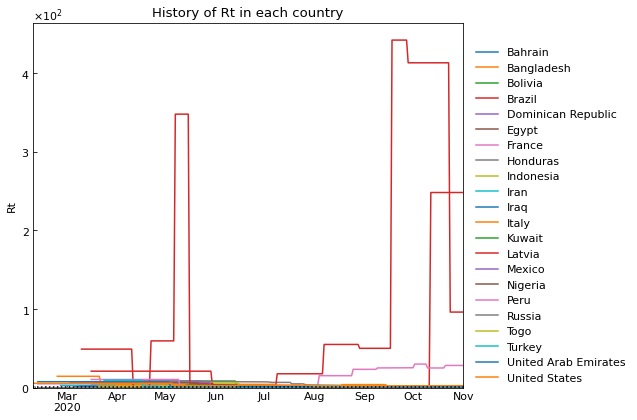

Country,Bahrain,Bangladesh,Bolivia,Brazil,Dominican Republic,Egypt,France,Honduras,Indonesia,Iran,...,Kuwait,Latvia,Mexico,Nigeria,Peru,Russia,Togo,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-28,0.87,0.77,0.39,248.13,0.88,1.26,28.29,1.73,1.03,1.28,...,1.02,96.14,1.21,0.6,0.73,1.66,2.34,1.37,0.85,2.6
2020-10-29,0.87,0.77,0.39,248.13,0.88,1.26,28.29,1.73,1.03,1.28,...,1.02,96.14,1.21,0.6,0.73,1.66,2.34,1.37,0.85,2.6
2020-10-30,0.87,0.77,0.39,248.13,0.88,1.26,28.29,1.73,1.03,1.28,...,1.02,96.14,1.21,0.6,0.73,1.66,2.34,1.37,0.85,2.6
2020-10-31,0.87,0.77,0.39,248.13,0.88,1.26,28.29,1.73,1.03,1.28,...,1.02,96.14,1.21,0.6,0.73,1.66,2.34,1.37,0.85,2.6
2020-11-01,0.87,0.77,0.39,248.13,0.88,1.26,28.29,1.73,1.03,1.28,...,1.02,96.14,1.21,0.6,0.73,1.66,2.34,1.37,0.85,2.6


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

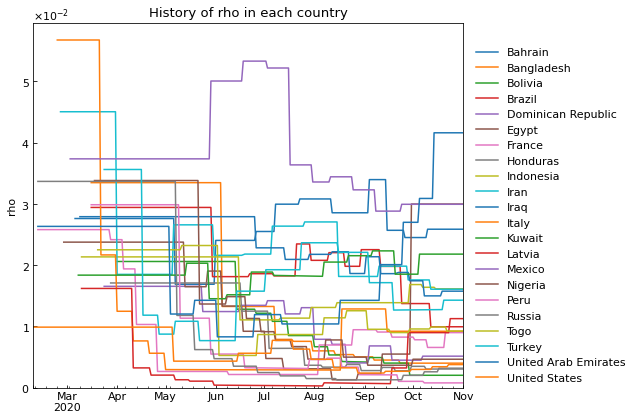

Country,Bahrain,Bangladesh,Bolivia,Brazil,Dominican Republic,Egypt,France,Honduras,Indonesia,Iran,...,Kuwait,Latvia,Mexico,Nigeria,Peru,Russia,Togo,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-28,0.025857,0.004004,0.002026,0.009942,0.005145,0.029964,0.008986,0.003045,0.016136,0.016069,...,0.021793,0.011268,0.029926,0.004645,0.000784,0.003185,0.009245,0.014277,0.041589,0.00377
2020-10-29,0.025857,0.004004,0.002026,0.009942,0.005145,0.029964,0.008986,0.003045,0.016136,0.016069,...,0.021793,0.011268,0.029926,0.004645,0.000784,0.003185,0.009245,0.014277,0.041589,0.00377
2020-10-30,0.025857,0.004004,0.002026,0.009942,0.005145,0.029964,0.008986,0.003045,0.016136,0.016069,...,0.021793,0.011268,0.029926,0.004645,0.000784,0.003185,0.009245,0.014277,0.041589,0.00377
2020-10-31,0.025857,0.004004,0.002026,0.009942,0.005145,0.029964,0.008986,0.003045,0.016136,0.016069,...,0.021793,0.011268,0.029926,0.004645,0.000784,0.003185,0.009245,0.014277,0.041589,0.00377
2020-11-01,0.025857,0.004004,0.002026,0.009942,0.005145,0.029964,0.008986,0.003045,0.016136,0.016069,...,0.021793,0.011268,0.029926,0.004645,0.000784,0.003185,0.009245,0.014277,0.041589,0.00377


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

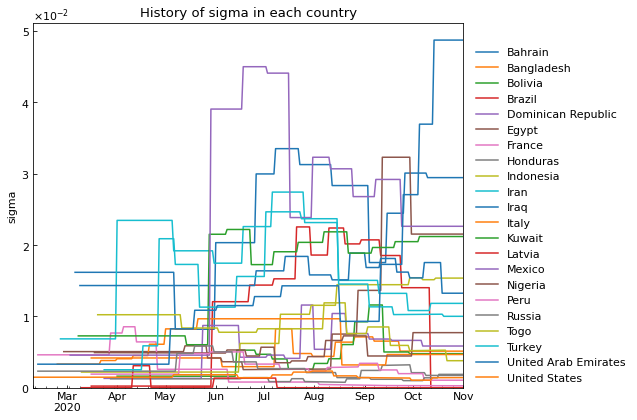

Country,Bahrain,Bangladesh,Bolivia,Brazil,Dominican Republic,Egypt,France,Honduras,Indonesia,Iran,...,Kuwait,Latvia,Mexico,Nigeria,Peru,Russia,Togo,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-28,0.029425,0.005119,0.004771,0.0,0.005838,0.021517,0.000272,0.00172,0.015352,0.011812,...,0.021175,0.0,0.022608,0.007712,0.001049,0.001868,0.003782,0.009999,0.04869,0.001413
2020-10-29,0.029425,0.005119,0.004771,0.0,0.005838,0.021517,0.000272,0.00172,0.015352,0.011812,...,0.021175,0.0,0.022608,0.007712,0.001049,0.001868,0.003782,0.009999,0.04869,0.001413
2020-10-30,0.029425,0.005119,0.004771,0.0,0.005838,0.021517,0.000272,0.00172,0.015352,0.011812,...,0.021175,0.0,0.022608,0.007712,0.001049,0.001868,0.003782,0.009999,0.04869,0.001413
2020-10-31,0.029425,0.005119,0.004771,0.0,0.005838,0.021517,0.000272,0.00172,0.015352,0.011812,...,0.021175,0.0,0.022608,0.007712,0.001049,0.001868,0.003782,0.009999,0.04869,0.001413
2020-11-01,0.029425,0.005119,0.004771,0.0,0.005838,0.021517,0.000272,0.00172,0.015352,0.011812,...,0.021175,0.0,0.022608,0.007712,0.001049,0.001868,0.003782,0.009999,0.04869,0.001413


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

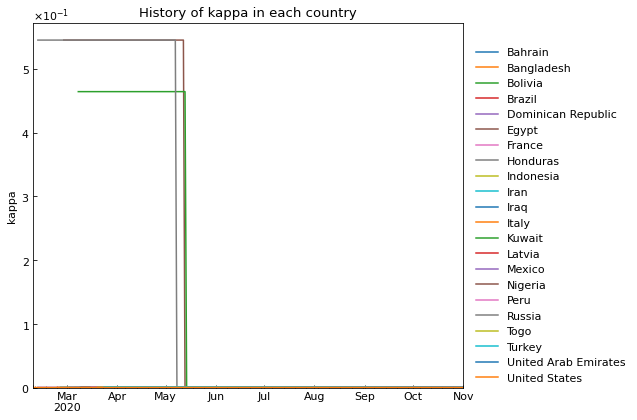

Country,Bahrain,Bangladesh,Bolivia,Brazil,Dominican Republic,Egypt,France,Honduras,Indonesia,Iran,...,Kuwait,Latvia,Mexico,Nigeria,Peru,Russia,Togo,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-28,0.00015,0.00007,0.000091,0.000039,0.000037,0.000335,0.000046,0.000037,0.000235,0.00019,...,0.000144,0.000117,0.00061,0.000031,0.000021,0.000046,0.000162,0.000213,0.000109,0.000037
2020-10-29,0.00015,0.00007,0.000091,0.000039,0.000037,0.000335,0.000046,0.000037,0.000235,0.00019,...,0.000144,0.000117,0.00061,0.000031,0.000021,0.000046,0.000162,0.000213,0.000109,0.000037
2020-10-30,0.00015,0.00007,0.000091,0.000039,0.000037,0.000335,0.000046,0.000037,0.000235,0.00019,...,0.000144,0.000117,0.00061,0.000031,0.000021,0.000046,0.000162,0.000213,0.000109,0.000037
2020-10-31,0.00015,0.00007,0.000091,0.000039,0.000037,0.000335,0.000046,0.000037,0.000235,0.00019,...,0.000144,0.000117,0.00061,0.000031,0.000021,0.000046,0.000162,0.000213,0.000109,0.000037
2020-11-01,0.00015,0.00007,0.000091,0.000039,0.000037,0.000335,0.000046,0.000037,0.000235,0.00019,...,0.000144,0.000117,0.00061,0.000031,0.000021,0.000046,0.000162,0.000213,0.000109,0.000037


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

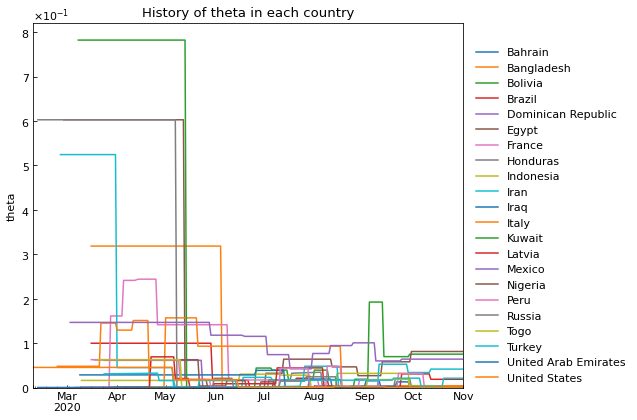

Country,Bahrain,Bangladesh,Bolivia,Brazil,Dominican Republic,Egypt,France,Honduras,Indonesia,Iran,...,Kuwait,Latvia,Mexico,Nigeria,Peru,Russia,Togo,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-28,0.000849,0.004355,0.075444,0.018935,0.000675,0.081472,0.001257,0.001426,0.000636,0.041838,...,0.001107,0.000966,0.064275,0.001072,0.000859,0.001259,0.001202,0.021313,0.000348,0.001159
2020-10-29,0.000849,0.004355,0.075444,0.018935,0.000675,0.081472,0.001257,0.001426,0.000636,0.041838,...,0.001107,0.000966,0.064275,0.001072,0.000859,0.001259,0.001202,0.021313,0.000348,0.001159
2020-10-30,0.000849,0.004355,0.075444,0.018935,0.000675,0.081472,0.001257,0.001426,0.000636,0.041838,...,0.001107,0.000966,0.064275,0.001072,0.000859,0.001259,0.001202,0.021313,0.000348,0.001159
2020-10-31,0.000849,0.004355,0.075444,0.018935,0.000675,0.081472,0.001257,0.001426,0.000636,0.041838,...,0.001107,0.000966,0.064275,0.001072,0.000859,0.001259,0.001202,0.021313,0.000348,0.001159
2020-11-01,0.000849,0.004355,0.075444,0.018935,0.000675,0.081472,0.001257,0.001426,0.000636,0.041838,...,0.001107,0.000966,0.064275,0.001072,0.000859,0.001259,0.001202,0.021313,0.000348,0.001159


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87964 entries, 0 to 88257
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 87964 non-null  datetime64[ns]
 1   Country                              87964 non-null  object        
 2   Rt                                   87964 non-null  float64       
 3   theta                                87964 non-null  float64       
 4   kappa                                87964 non-null  float64       
 5   rho                                  87964 non-null  float64       
 6   sigma                                87964 non-null  float64       
 7   School_closing                       87964 non-null  int64         
 8   Workplace_closing                    87964 non-null  int64         
 9   Cancel_events                        87964 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.138118,-0.111414,-0.070629,-0.237243,-0.305702,-0.137931,-0.192847,-0.151953,0.095492,-0.158999,-0.228060,-0.108215,0.081979,0.075758,-0.113542,-0.254498
theta,-0.138118,1.000000,0.974434,0.708340,0.067524,-0.135603,-0.085829,-0.096222,-0.178006,-0.311107,-0.035534,-0.131411,0.174345,-0.324502,-0.157970,-0.052417,0.039698
kappa,-0.111414,0.974434,1.000000,0.698015,0.009390,-0.167288,-0.106544,-0.131917,-0.198778,-0.357331,-0.056748,-0.207981,0.182982,-0.330564,-0.110822,-0.033583,-0.009868
rho,-0.070629,0.708340,0.698015,1.000000,0.236257,-0.201673,-0.192454,-0.091034,-0.186645,-0.333652,-0.048135,0.010576,0.128967,-0.360201,-0.326924,-0.272623,0.057459
sigma,-0.237243,0.067524,0.009390,0.236257,1.000000,0.237614,0.074363,0.266274,0.120893,0.100219,0.143830,0.337848,0.063645,0.012385,-0.045116,0.067898,0.241069
School_closing,-0.305702,-0.135603,-0.167288,-0.201673,0.237614,1.000000,0.782336,0.800405,0.736596,0.256880,0.783309,0.332873,0.524756,0.699179,0.387975,0.514709,0.790572
Workplace_closing,-0.137931,-0.085829,-0.106544,-0.192454,0.074363,0.782336,1.000000,0.738498,0.727446,0.140306,0.816057,0.044426,0.467891,0.663035,0.430335,0.494592,0.695084
Cancel_events,-0.192847,-0.096222,-0.131917,-0.091034,0.266274,0.800405,0.738498,1.000000,0.747425,0.242372,0.731226,0.335512,0.631458,0.679779,0.232976,0.375061,0.800047
Gatherings_restrictions,-0.151953,-0.178006,-0.198778,-0.186645,0.120893,0.736596,0.727446,0.747425,1.000000,0.222056,0.744200,0.293594,0.583804,0.593657,0.261788,0.316045,0.730113
Transport_closing,0.095492,-0.311107,-0.357331,-0.333652,0.100219,0.256880,0.140306,0.242372,0.222056,1.000000,0.191087,0.485633,0.056388,0.364376,0.057102,0.187147,0.238146


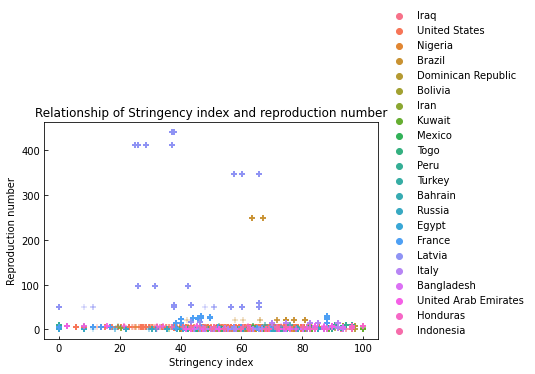

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()